<a href="https://colab.research.google.com/github/XanOlazcuagaGaribal/python/blob/main/M1_Analyse_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

from google.colab import drive
drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/DC/Algorithmie/Data/Games/'
games = pd.read_csv(root_path + "vgsales.csv", sep=",")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [6]:
games.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [8]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


 Les colonnes correspondent à:

 - **Name**: Nom du jeu
 - **Platform**: Plateforme de publication du jeu
 - **Year**: Année de sortie du jeu
 - **Genre**: Genre du jeu
 - **Publisher**: Studio de création du jeu
 - **NA_Sales**: Nombre de ventes en Amérique du Nord en million
 - **EU_Sales**: Nombre de ventes en Europe en million
 - **JP_Sales**: Nombre de ventes au Japon en million
 - **Other_Sales**: Nombre de ventes dans les autres pays en million
 - **Global_Sales**: Nombre de ventes totales en million

On va regarder les différents studios présents sur ce dataset

In [ ]:
games['Publisher'].unique()

In [56]:
nintendo["Platform"].unique()

array(['Wii', 'NES', 'GB', 'DS', 'SNES', 'GBA', '3DS', 'N64', 'GC',
       'WiiU'], dtype=object)

Comme on peut le voir il y a de nombreuses entreprises. Dans un premier temps nous allons voir quelques données en général, puis nous prendrons une entreprise particulière pour voir ses données.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


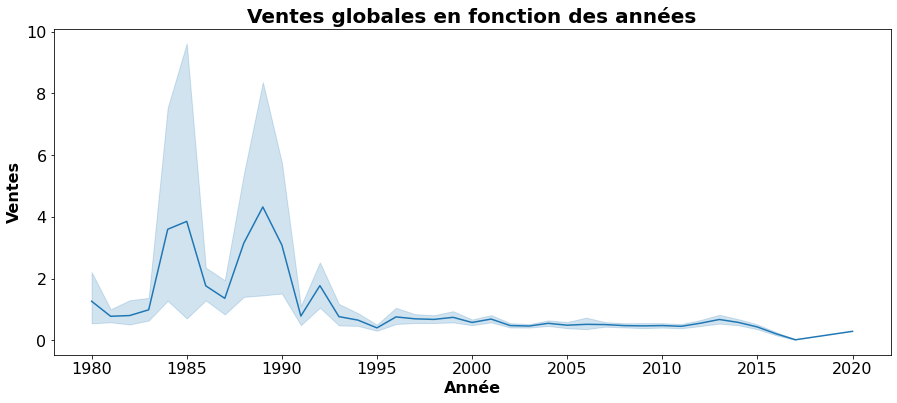

In [31]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(games['Year'], games['Global_Sales'] )

ax.set_title('Ventes globales en fonction des années', fontsize = 20, loc='center',fontdict=dict(weight='bold'))
ax.set_xlabel('Année', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Ventes', fontsize = 16, fontdict=dict(weight='bold'))

plt.tick_params(axis='y', which='major', labelsize=16)
plt.tick_params(axis='x', which='major', labelsize=16)

Les ventes globales dépendent de la console sur laquelle les jeux sont sortis. Comme a pu le voir, la console la plus récente de cette liste est la WiiU. On comprend donc mieux le pic entre les années 1983 et 1993, qui correspond à l'age "d'or" de ces anciennes consoles.

In [101]:
games.nlargest(3,'Global_Sales')

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82


Ces 3 valeurs représentent le top 3 des meilleures ventes de ce dataset. Comme on peut le voir, c'est Nintendo qui domine ce top 3 avec en premier Wii Sports, qui a généré 82.74 millions d'euros dans le monde.

Pour la suite nous allons donc utiliser les données de Nintendo, puisque c'est la plus importante de ce dataset.

# Nintendo

On va donc se focaliser sur Nintendo. Pour cela on récupère toutes les données du dataset que l'on copie dans une nouvelle variable pour ne pas modifier le dataset original

In [35]:
# On crée le dataset Nintendo
nintendo = games[games['Publisher'] == 'Nintendo'].copy()

In [36]:
nintendo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 703 entries, 0 to 16542
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          703 non-null    int64  
 1   Name          703 non-null    object 
 2   Platform      703 non-null    object 
 3   Year          696 non-null    float64
 4   Genre         703 non-null    object 
 5   Publisher     703 non-null    object 
 6   NA_Sales      703 non-null    float64
 7   EU_Sales      703 non-null    float64
 8   JP_Sales      703 non-null    float64
 9   Other_Sales   703 non-null    float64
 10  Global_Sales  703 non-null    float64
dtypes: float64(6), int64(1), object(4)
memory usage: 65.9+ KB


In [37]:
nintendo.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Maitenant que l'on a insolé Nintendo, nous allons pouvoir regarder l'évolution des ventes

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


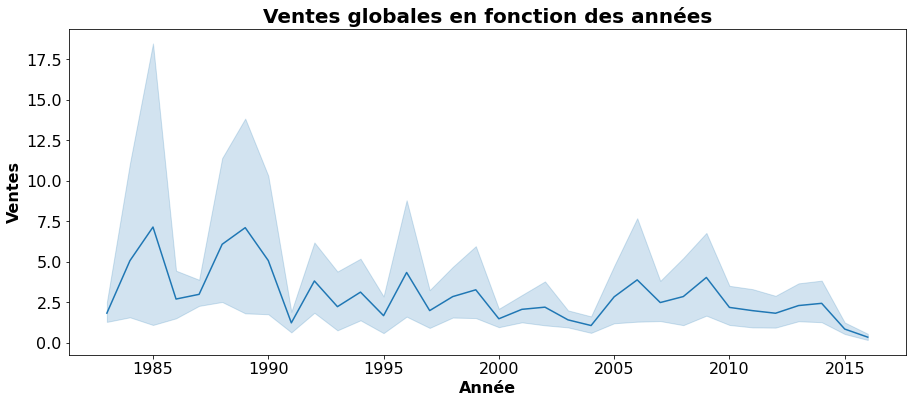

In [79]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(nintendo['Year'], nintendo['Global_Sales'] )

ax.set_title('Ventes globales en fonction des années', fontsize = 20, loc='center',fontdict=dict(weight='bold'))
ax.set_xlabel('Année', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Ventes', fontsize = 16, fontdict=dict(weight='bold'))

plt.tick_params(axis='y', which='major', labelsize=16)
plt.tick_params(axis='x', which='major', labelsize=16)

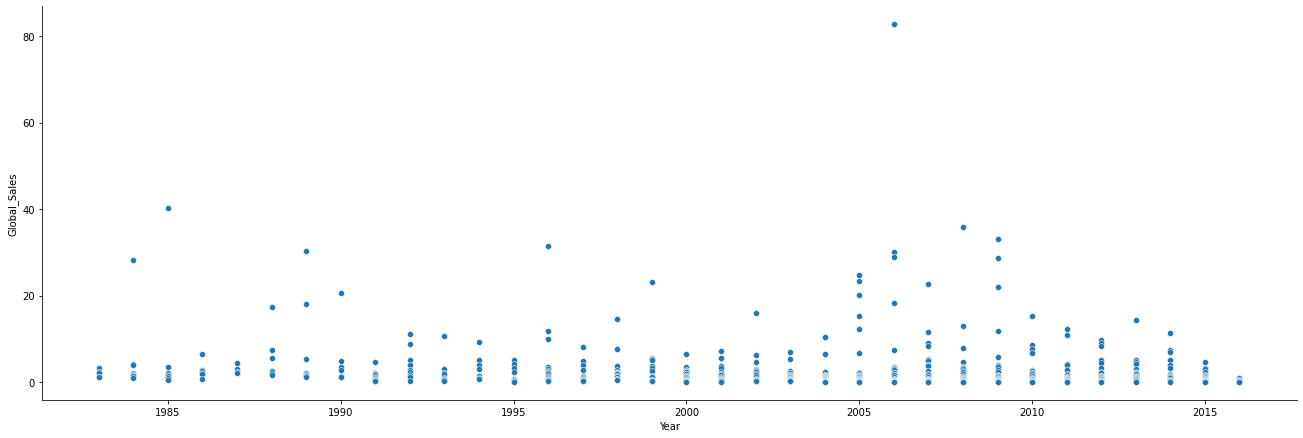

In [107]:
nintendo_sales = nintendo[['Year','Global_Sales']]
sns.relplot(x="Year", y="Global_Sales", data = nintendo_sales,height=6, aspect = 3);


On peut également regarder Le nombre de sorties par années

In [75]:
nintendo['Year'].value_counts()

2004.0    57
2006.0    53
2005.0    45
2007.0    42
2008.0    32
2015.0    32
2009.0    32
2012.0    31
2010.0    28
2003.0    27
2011.0    26
2013.0    23
2000.0    23
2002.0    22
2001.0    22
2014.0    20
1999.0    20
1996.0    17
1998.0    17
1997.0    13
1991.0    13
2016.0    10
1995.0    10
1992.0    10
1993.0     9
1989.0     9
1984.0     9
1994.0     8
1985.0     7
1990.0     7
1983.0     6
1988.0     6
1986.0     6
1987.0     4
Name: Year, dtype: int64

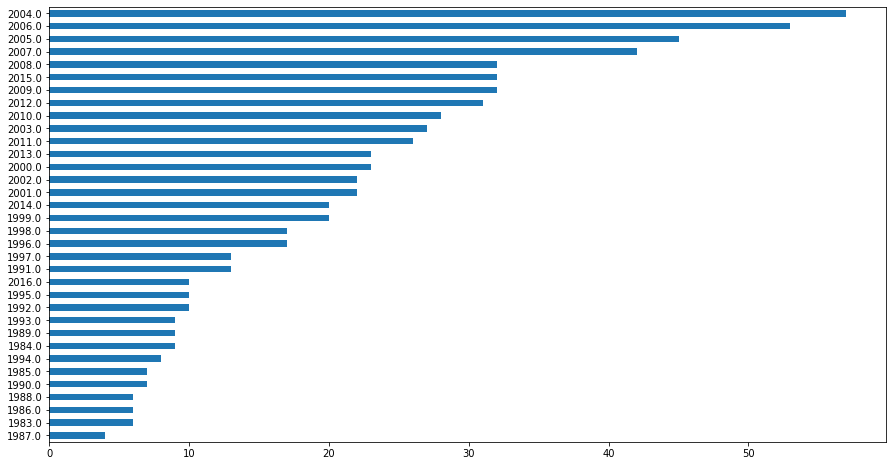

In [99]:
plt.figure(figsize=(15,8))
nintendo['Year'].value_counts().sort_values().plot(kind = 'barh')

##Traitement des données manquantes

In [53]:
nintendo.isna()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
16269,False,False,False,False,False,False,False,False,False,False,False
16357,False,False,False,False,False,False,False,False,False,False,False
16456,False,False,False,False,False,False,False,False,False,False,False
16473,False,False,False,False,False,False,False,False,False,False,False


In [52]:
nintendo.isna().sum()

Rank            0
Name            0
Platform        0
Year            7
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

On peut voir que sur 703 lignes, seulement 7 possèdent une date vide. Ce résultat étant négligeable nous allons garder ces valeurs.

##Analyse par console


In [55]:
nintendo["Platform"].unique()

array(['Wii', 'NES', 'GB', 'DS', 'SNES', 'GBA', '3DS', 'N64', 'GC',
       'WiiU'], dtype=object)

On va maintenant regarder les ventes pour les jeux NES

In [57]:
nintendo_nes = nintendo[nintendo['Platform'] == 'NES'].copy()

In [58]:
nintendo_nes.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31
22,23,Super Mario Bros. 3,NES,1988.0,Platform,Nintendo,9.54,3.44,3.84,0.46,17.28
96,97,Super Mario Bros. 2,NES,1988.0,Platform,Nintendo,5.39,1.18,0.70,0.19,7.46
127,128,The Legend of Zelda,NES,1986.0,Action,Nintendo,3.74,0.93,1.69,0.14,6.51


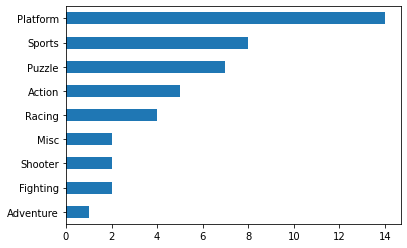

In [91]:
count = nintendo_nes['Genre'].value_counts()
nintendo_nes['Genre'].value_counts().sort_values().plot(kind = 'barh')

Nous pouvons constater que les jeux les plus développés pour la NES sont les jeux de platforme. Nous allons donc utiliser ces jeux pour la suite. 

In [69]:
nes_platform = nintendo_nes[nintendo_nes['Genre'] == 'Platform'].copy()
nes_platform.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
22,23,Super Mario Bros. 3,NES,1988.0,Platform,Nintendo,9.54,3.44,3.84,0.46,17.28
96,97,Super Mario Bros. 2,NES,1988.0,Platform,Nintendo,5.39,1.18,0.70,0.19,7.46
573,574,Super Mario Bros.: The Lost Levels,NES,1986.0,Platform,Nintendo,0.00,0.00,2.65,0.00,2.65
700,702,Mario Bros.,NES,1983.0,Platform,Nintendo,0.51,0.12,1.63,0.02,2.28


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


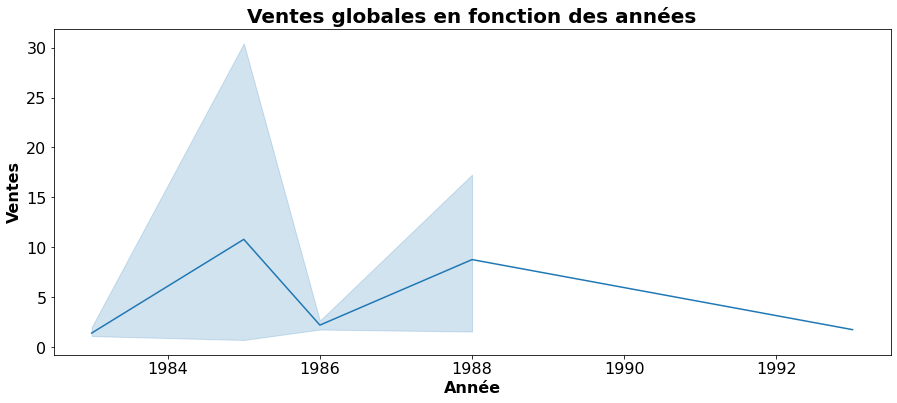

In [73]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(nes_platform['Year'], nes_platform['Global_Sales'] )

ax.set_title('Ventes globales en fonction des années', fontsize = 20, loc='center',fontdict=dict(weight='bold'))
ax.set_xlabel('Année', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Ventes', fontsize = 16, fontdict=dict(weight='bold'))

plt.tick_params(axis='y', which='major', labelsize=16)
plt.tick_params(axis='x', which='major', labelsize=16)

On peut voir que les résultats des jeux de platformes sur NES ne sont pas bons, puisqu'ils sont en moyenne en dessous 